# Investigating Loss Value Trend
### Losses according to diff weights and biases

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Taking co-ordinates and plotting them

In [2]:
# Plotting X and Y co-ordinates
X = [2,3,4,5,8]
Y = [0.047, 0.268, 0.73, 0.952, 0.999]

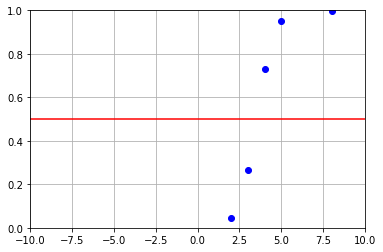

In [3]:
# Plotting the points along with 0.5 line
plt.axis([-10, 10, 0, 1])
x0 = [-10, 10] 
y0 = [0.5, 0.5]
plt.plot(x0,y0, 'r')
plt.plot(X,Y, 'bo')
plt.grid(True)
plt.show()

In [4]:
# Function to plot sigmoid curve output
def curve_output(x, w, b):
    if type(x) == int:
        return  1 / (1 + math.pow(math.e, -1*(w*x + b)))
    elif type(x) == np.ndarray:
        y = []
        for x_point in x:
            y_point = 1 / (1 + math.pow(math.e, -1*(w*x_point + b)))
            y.append(y_point)
        return y

In [5]:
# Function to get curve samples
def logistic_curve(w, b):
    x_curve = np.linspace(-10, 10) 
    y_curve = curve_output(x_curve, w, b)
    return x_curve, y_curve

In [6]:
# Plotting logistic curves along with the co-ordinates
def plot(X, Y, w, b):
    plt.axis([-10, 10, 0, 1])
    x0 = [-10, 10] 
    y0 = [0.5, 0.5]
    plt.plot(x0,y0, 'g')
    plt.plot(X,Y, 'bo')

    x_curve, y_curve = logistic_curve(w=w, b=b)
    plt.plot(x_curve, y_curve, 'r')

    plt.grid(True)
    plt.show()

In [7]:
# Calculating Loss using MSE Loss function
def calc_loss(X, Y, w, b):
    loss = 0
    for i in range(len(X)):
        y = curve_output(X[i], w, b)
        loss += math.pow(y-Y[i], 2)
    loss /= len(X)
    return loss
    

## Plotting Samples using diff values of 'w' and 'b'

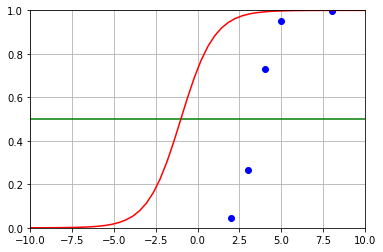

Loss: 0.28025687135363975


In [18]:
w = 1
b = 1
plot(X=X, Y=Y, w=w, b=b)
print(f'Loss: {calc_loss(X,Y,w=w,b=b)}')

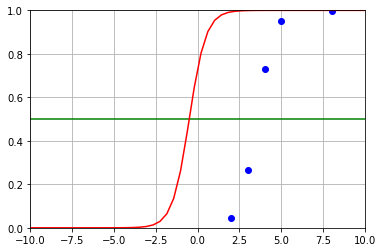

Loss: 0.30102501009446325


In [19]:
w = 2
b = 1
plot(X=X, Y=Y, w=w, b=b)
print(f'Loss: {calc_loss(X,Y,w=w,b=b)}')

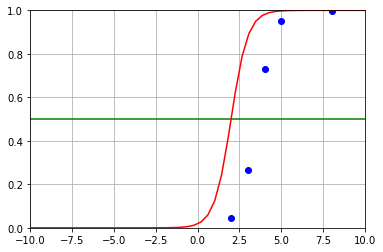

Loss: 0.12926278778782826


In [14]:
w = 2
b = -4
plot(X=X, Y=Y, w=w, b=b)
print(f'Loss: {calc_loss(X,Y,w=w,b=b)}')

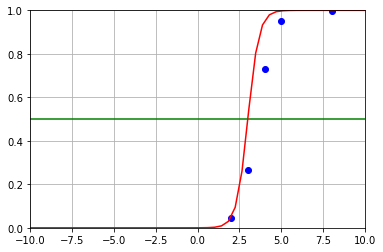

Loss: 0.021087432945851768


In [15]:
w = 3
b = -9
plot(X=X, Y=Y, w=w, b=b)
print(f'Loss: {calc_loss(X,Y,w=w,b=b)}')

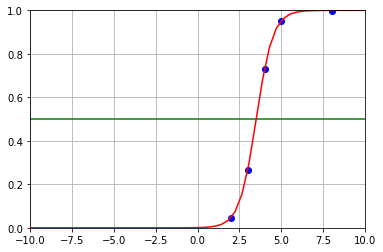

Loss: 6.57257910560957e-07


In [16]:
w = 2
b = -7
plot(X=X, Y=Y, w=w, b=b)
print(f'Loss: {calc_loss(X,Y,w=w,b=b)}')

## Plotting a graph to compare the diff loss functions with diff values of w and b

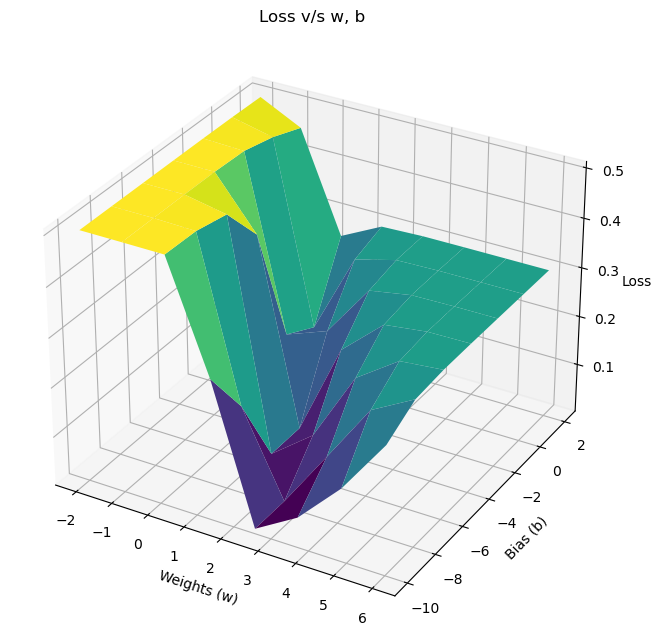

In [17]:
# W -> x-axis
# B -> y-axis
# loss -> z-axis

w_axis = np.linspace(-2, 6, 8)
b_axis = np.linspace(-10, 2, 7)
W, B = np.meshgrid(w_axis, b_axis)

L = []
for i in range(np.shape(W)[0]):
    l = []
    for j in range(np.shape(B)[1]):
        loss_ind = calc_loss(X,Y,W[i][j], B[i][j])
        l.append(loss_ind)
    L.append(l)
L = np.array(L)


fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.plot_surface(W,B,L,cmap='viridis', edgecolor='none')
ax.set_xlabel("Weights (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("Loss") 
ax.set_title('Loss v/s w, b')
plt.show()

### Observation:
It is observed that with increase in weight the curve becomes more and more steeper, the slope of the line increases.  
While with the increasing bias the curve horizontally shifts towards the negative x-axis.  
<b>The Weight has a +ve correlation with the slope of the curve.  
The Bias has a -ve correlation with the horizontal shift of the curve. </b> 


As performed in class the least loss came when we took w=2 and b=-7


<b>
    Harjyot Singh Bagga - 18BCE0694
</b>